In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, glob

In [2]:
wind_path = "../railsplitterHistories/*Histories_*.csv"
solar_path = "../solarHistories/*Histories_*.csv"

solarfiles = glob.glob(solar_path, recursive=True)
solarfiles.sort()
windfiles = glob.glob(wind_path, recursive=True)
windfiles.sort()

In [3]:
windfiles

['../railsplitterHistories/RailSplitterHistories_0.csv',
 '../railsplitterHistories/RailSplitterHistories_1.csv',
 '../railsplitterHistories/RailSplitterHistories_2.csv',
 '../railsplitterHistories/RailSplitterHistories_3.csv',
 '../railsplitterHistories/RailSplitterHistories_4.csv',
 '../railsplitterHistories/RailSplitterHistories_5.csv',
 '../railsplitterHistories/RailSplitterHistories_6.csv',
 '../railsplitterHistories/RailSplitterHistories_7.csv',
 '../railsplitterHistories/RailSplitterHistories_8.csv',
 '../railsplitterHistories/RailSplitterHistories_9.csv']

In [4]:
yearhours = pd.date_range(start='2019', end='2020', freq='H')[:8760]
yearhours

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [34]:
df = pd.read_csv(solarfiles[5])
df['year'] = yearhours
df

,time,power_data,power_norm,year
0,0.0,0.0,-116.801308,2019-01-01 00:00:00
1,1.0,0.0,-226.075277,2019-01-01 01:00:00
2,2.0,0.0,-188.775105,2019-01-01 02:00:00
3,3.0,0.0,-161.912395,2019-01-01 03:00:00
4,4.0,0.0,-13.282051,2019-01-01 04:00:00
...,...,...,...,...
8755,8755.0,0.0,3151.895677,2019-12-31 19:00:00
8756,8756.0,0.0,3019.487203,2019-12-31 20:00:00
8757,8757.0,0.0,3000.744375,2019-12-31 21:00:00
8758,8758.0,0.0,3057.609373,2019-12-31 22:00:00


In [35]:
df = df.set_index('year').drop(columns=['time','power_norm'])
df

,power_data
year,
2019-01-01 00:00:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 02:00:00,0.0
2019-01-01 03:00:00,0.0
2019-01-01 04:00:00,0.0
...,...
2019-12-31 19:00:00,0.0
2019-12-31 20:00:00,0.0
2019-12-31 21:00:00,0.0


<AxesSubplot:xlabel='year'>

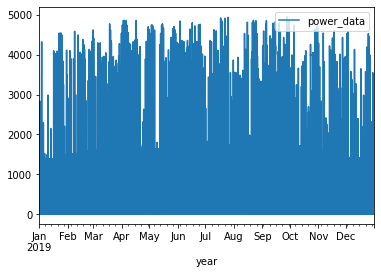

In [36]:
df.plot()

In [43]:
for file in solarfiles:
    df = pd.read_csv(file)
    df.drop(columns=['time','power_norm'],inplace=True)
    df['time'] = yearhours
    df = df.set_index('time')
    file = file.strip('.csv')
    save_name = "../"+file+"_pd.csv"
    df.to_csv(save_name)